In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

In [1]:
f = open("test.fasta", 'r')
lines = f.readlines()

contigs = []
cur_string = ""
N_count = 0

for line in lines:
    if line[0] == '>':
        cur_string = cur_string.strip('N')
        if not cur_string == "":
            contigs.append(cur_string)
            cur_string = ""
    line = line.rstrip('\n')
    for c in line:
        cur_string += c
        if c == 'N':
            N_count += 1
            if N_count >= 10:
                cur_string = cur_string.strip('N')
                if not cur_string == "":
                    contigs.append(cur_string)
                    cur_string = ""
        else:
            N_count = 0

In [10]:
data_len = pd.Series([len(c) for c in contigs])
data_len_small = data_len[data_len <= 50000]
data_len_large = data_len[data_len > 50000]

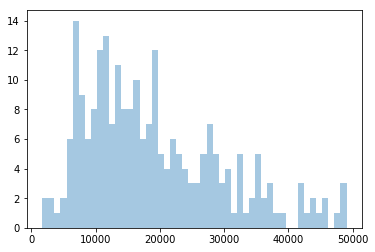

In [14]:
sns.distplot(data_len_small, bins = 50, kde = False)

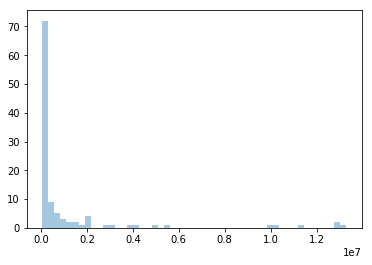

In [15]:
sns.distplot(data_len_large, bins = 50, kde = False)

In [16]:
ref = open("dmel-all-chromosome-r6.24.fasta", 'r')
lines = ref.readlines()

ref_contigs = []
cur_string = ""
N_count = 0

for line in lines:
    if line[0] == '>':
        cur_string = cur_string.strip('N')
        if not cur_string == "":
            ref_contigs.append(cur_string)
            cur_string = ""
    line = line.rstrip('\n')
    for c in line:
        cur_string += c
        if c == 'N':
            N_count += 1
            if N_count >= 10:
                cur_string = cur_string.strip('N')
                if not cur_string == "":
                    ref_contigs.append(cur_string)
                    cur_string = ""
        else:
            N_count = 0

In [91]:
ref_data_len = pd.Series([len(c) for c in ref_contigs])
s1 = data_len.sort_values()
s2 = ref_data_len.sort_values()

d:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'portion'), Text(0.5,0,'read length')]

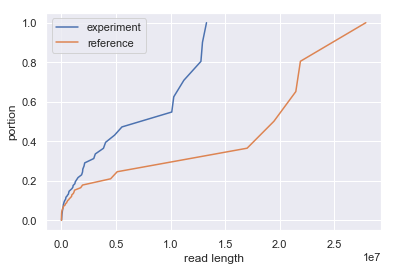

In [102]:
total = sum(s1)
s11 = s1 / total
s11 = s11.cumsum()
ax = sns.lineplot(s1, s11, label = 'experiment')

total = sum(s2)
s22 = s2 / total
s22 = s22.cumsum()
ax = sns.lineplot(s2, s22, label = 'reference')

ax.set(xlabel = "read length", ylabel = "portion")